In [6]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [4]:
!pip install scikit-learn

^C


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 660.6 kB/s eta 0:00:17
   ---------------------------------------- 0.0/10.9 MB 495.5 kB/s eta 0:00:22
   ---------------------------------------- 0.1/10.9 MB 409.6 kB/s eta 0:00:27
   ---------------------------------------- 0.1/10.9 MB 459.5 kB/s eta 0:00:24
   ---------------------------------------- 0.1/10.9 MB 459.5 kB/s eta 0:00:24
   ---------------------------------------- 0.1/10.9 MB 364.4 kB/s eta 0:00:30
   ---------------------------------------- 0.1/10.9 MB 364.4 kB/s eta 0:00:30
   ---------------------------------------- 0.1/10.9 MB 327.4 kB/s eta 0:00:34
   ---------------------------------------- 0.1/10.9 MB 327.4 kB/s eta 0:00:34
    --------------------------------------- 0.2/10.9 MB 305.7 kB/s eta 0:00:36
    --------------------------------------- 0.2/10.9 MB 305.7 

In [7]:
filename = 'building1retail.csv'
df = pd.read_csv(filename, index_col=[0], 
                 date_parser=lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M"))
df.head()


C:\Users\janko\AppData\Local\Temp\ipykernel_4728\3537037558.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(filename, index_col=[0],


OAT (F)  Power (kW)
Timestamp                               
2010-01-01 01:15:00       51       165.1
2010-01-01 01:30:00       51       151.6
2010-01-01 01:45:00       51       146.9
2010-01-01 02:00:00       51       153.7
2010-01-01 02:15:00       51       153.8

<Axes: xlabel='Timestamp'>

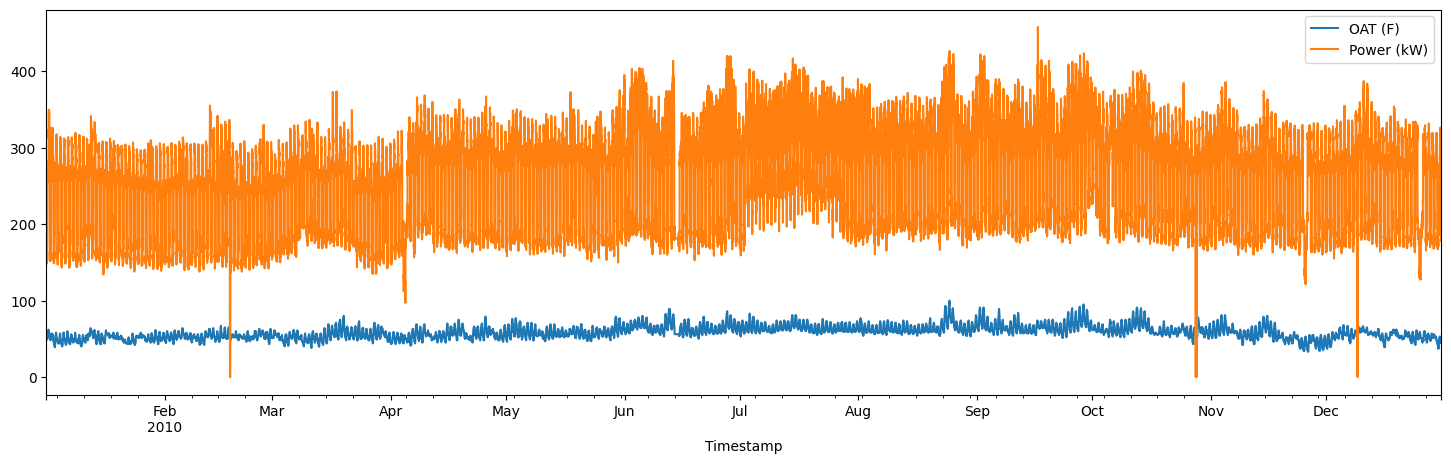

In [8]:
df.plot(figsize=(18,5))

<AxesSubplot:xlabel='Timestamp'>

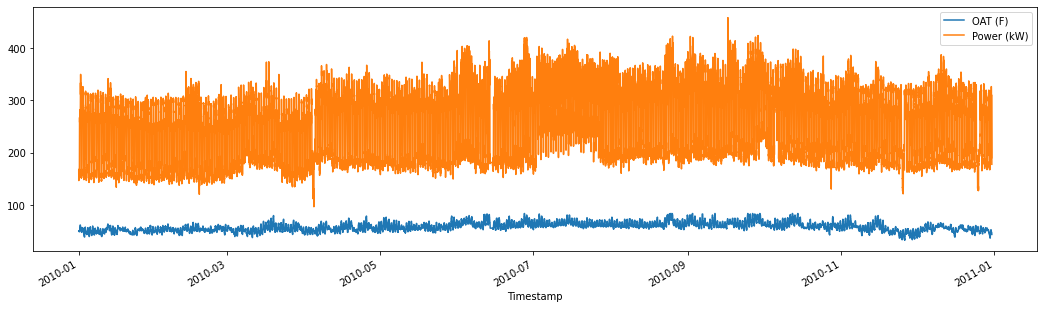

In [ ]:
std_dev = 3
df = df[(np.abs(stats.zscore(df)) < std_dev).all(axis=1)]
df.plot(figsize=(18,5))


array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>],
      dtype=object)

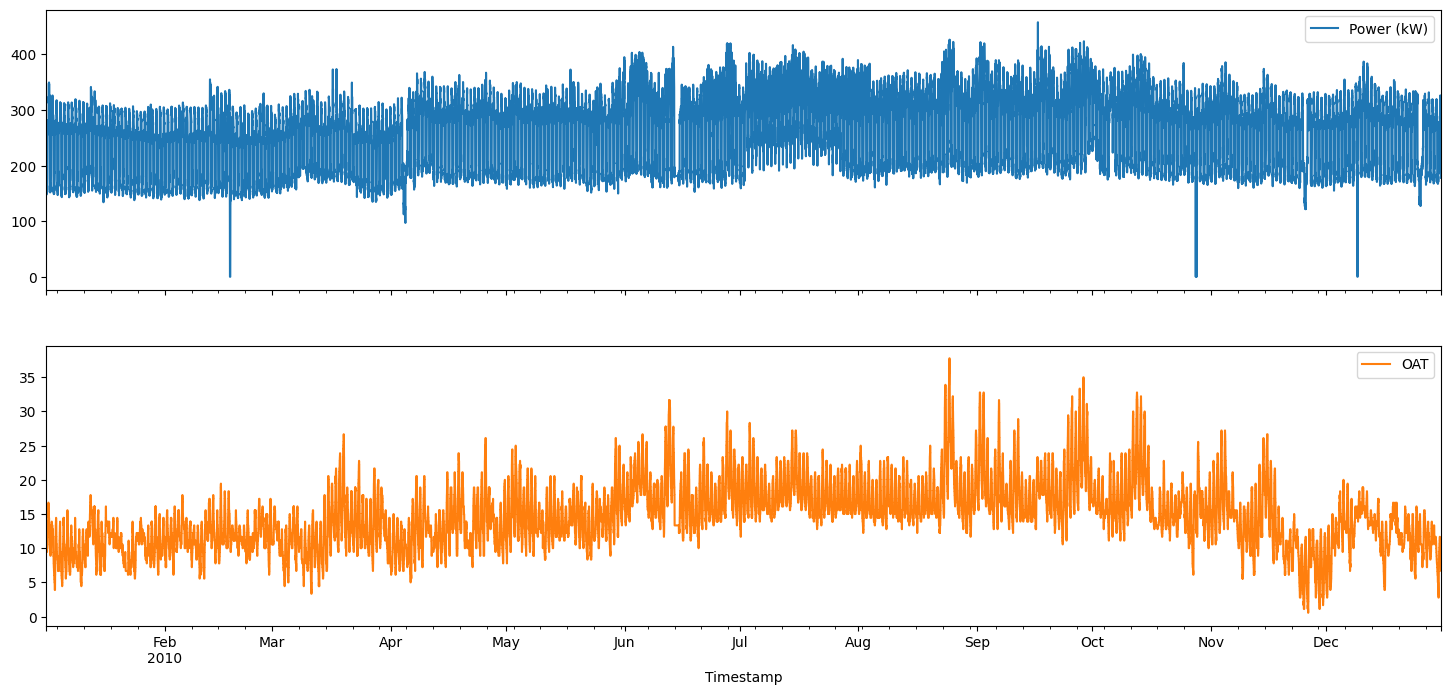

In [9]:
df["OAT"] = (df["OAT (F)"] - 32) / 1.8
df.drop(columns=["OAT (F)"], inplace=True)
df.plot(subplots=True,figsize=(18,8))


In [5]:
plt.hexbin(df['OAT'], df['Power (kW)'])

NameError: name 'plt' is not defined

array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>],
      dtype=object)

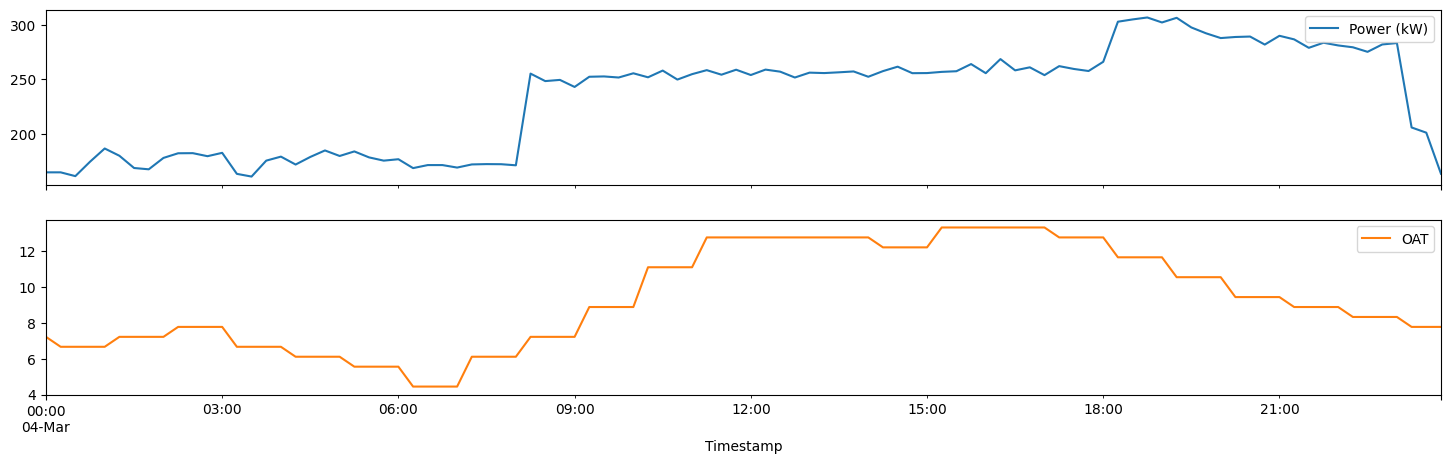

In [14]:
df.loc['2010-03-04', ['Power (kW)','OAT']].plot(subplots=True, figsize=(18,5))

In [15]:
x = pd.DataFrame(df['OAT'])
y = pd.DataFrame(df['Power (kW)'])


In [22]:
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True)


In [23]:
for i, (train, test) in enumerate(kfold.split(x, y)):
    model.fit(x.iloc[train,:], y.iloc[train,:])
    score = model.score(x.iloc[test,:], y.iloc[test,:])
    scores.append(score)

scores

[0.8135408888696609, 0.8061687701651726, 0.8080978662103657]

<Axes: xlabel='Timestamp'>

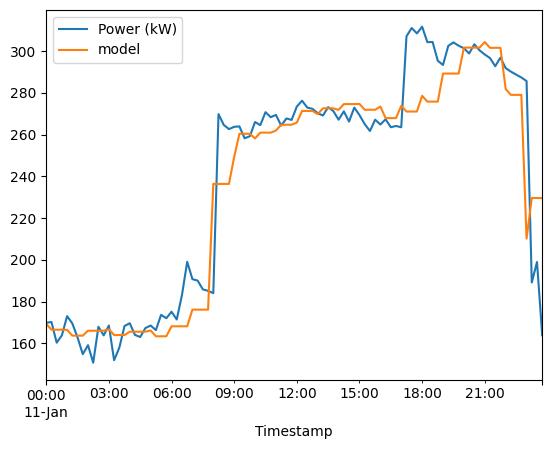

In [26]:
day = '2010-01-11'
test_day = y.loc[day, :]
test_day["model"] = model.predict(x.loc[day, :])
test_day.plot()


In [20]:
x = pd.DataFrame(df['OAT'])
x["tod"] = x.index.hour

# drop_first = True removes multi-collinearity
add_var = pd.get_dummies(x["tod"], prefix="tod", drop_first=True)

# Add all the columns to the model data
x = x.join(add_var)

# Drop the original column that was expanded
x.drop(columns=["tod"], inplace=True)

x.head()


OAT  tod_1  tod_2  tod_3  tod_4  tod_5  tod_6  \
Timestamp                                                                  
2010-01-01 01:15:00  10.555556   True  False  False  False  False  False   
2010-01-01 01:30:00  10.555556   True  False  False  False  False  False   
2010-01-01 01:45:00  10.555556   True  False  False  False  False  False   
2010-01-01 02:00:00  10.555556  False   True  False  False  False  False   
2010-01-01 02:15:00  10.555556  False   True  False  False  False  False   

                     tod_7  tod_8  tod_9  ...  tod_14  tod_15  tod_16  tod_17  \
Timestamp                                 ...                                   
2010-01-01 01:15:00  False  False  False  ...   False   False   False   False   
2010-01-01 01:30:00  False  False  False  ...   False   False   False   False   
2010-01-01 01:45:00  False  False  False  ...   False   False   False   False   
2010-01-01 02:00:00  False  False  False  ...   False   False   False   False   
2010-01-01 02:15:00  False  False  False  ...   False   False   False   False   

                     tod_18  tod_19  tod_20  tod_21  tod_22  tod_23  
Timestamp                                                            
2010-01-01 01:15:00   False   False   False   False   False   False  
2010-01-01 01:30:00   False   False   False   False   False   False  
2010-01-01 01:45:00   False   False   False   False   False   False  
2010-01-01 02:00:00   False   False   False   False   False   False  
2010-01-01 02:15:00   False   False   False   False   False   False  

[5 rows x 24 columns]